<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/%EA%B5%AC%EA%B8%80%EC%A3%BC%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv('/content/GOOG.csv')

In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3803,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3804,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3805,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3806,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3807,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


In [ ]:
data.shape

(3808, 7)

In [ ]:
data_training = data[data['Date']<'2019-01-01']
data_test=data[data['Date']>='2019-01-01']

In [ ]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3616,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3617,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3618,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3619,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3620,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [ ]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
data_training.shape

(3616, 5)

In [ ]:
scaler = MinMaxScaler()
data_training2 = scaler.fit_transform(data_training)
data_training2

array([[7.42148227e-04, 2.98909923e-03, 6.47716504e-04, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 4.19769536e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 1.92238659e-03, 1.98678849e-03,
        1.85522018e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.89936884e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20026849e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12100139e-01, 8.09012935e-01,
        1.79975186e-02]])

In [ ]:
a

In [ ]:
type(data_test)

pandas.core.frame.DataFrame

In [ ]:
X_train = []
y_train = []

for i in range(60, data_training2.shape[0]):
    X_train.append(data_training2[i-60:i])
    y_train.append(data_training2[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape,y_train.shape

((3556, 60, 5), (3556,))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
112/112 [==============================] - 17s 154ms/step - loss: 0.0010
Epoch 2/10
112/112 [==============================] - 18s 159ms/step - loss: 8.6432e-04
Epoch 3/10
112/112 [==============================] - 18s 157ms/step - loss: 8.8932e-04
Epoch 4/10
112/112 [==============================] - 18s 158ms/step - loss: 8.2000e-04
Epoch 5/10
112/112 [==============================] - 18s 157ms/step - loss: 8.4912e-04
Epoch 6/10
112/112 [==============================] - 18s 156ms/step - loss: 7.8534e-04
Epoch 7/10
112/112 [==============================] - 18s 159ms/step - loss: 8.6204e-04
Epoch 8/10
112/112 [==============================] - 18s 158ms/step - loss: 7.9560e-04
Epoch 9/10
112/112 [==============================] - 17s 155ms/step - loss: 7.0798e-04
Epoch 10/10
112/112 [==============================] - 18s 160ms/step - loss: 7.6177e-04


<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 3616 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       192 non-null    object 
 1   Open       192 non-null    float64
 2   High       192 non-null    float64
 3   Low        192 non-null    float64
 4   Close      192 non-null    float64
 5   Adj Close  192 non-null    float64
 6   Volume     192 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.0+ KB


In [ ]:
past_60_days=data_training.tail(60)

In [71]:

df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [72]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92211281, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.9133975 , 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89859758, 0.90204445, 0.02331778],
       ...,
       [0.93940683, 0.93712442, 0.93521069, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92782574, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95011399, 0.95130949, 0.01398824]])

In [73]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((192, 60, 5), (192,))

In [74]:
y_pred = regressor.predict(X_test)

In [75]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.33517573e-04, 8.20673293e-04,
       1.21162775e-08])

In [76]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [77]:
y_pred = y_pred*scale
y_test = y_test*scale

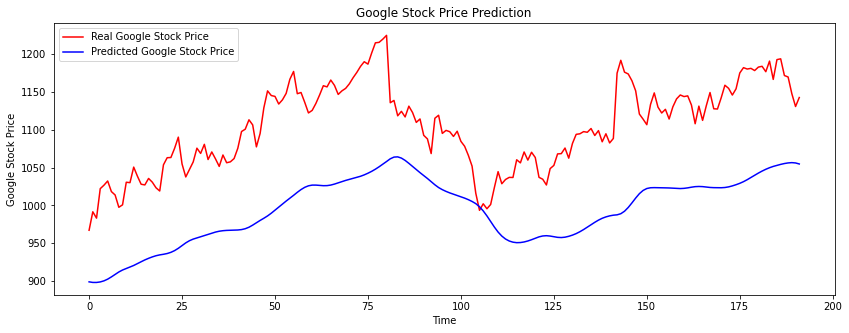

In [78]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()